<a href="https://colab.research.google.com/github/EdgaRojas/MachineLearning/blob/main/Unidad2/5_XGBoost.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# XGBoost (Extreme Gradient Boosting)

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from xgboost import XGBRegressor

# Cargar el dataset
df = pd.read_csv("asesinatos.csv", encoding='latin1')
df.head()

,Estado,id_area,habitantes,area_km2,ingresos_medios,edad_media_poblacion,densidad_poblacional,indice_gini,tasa_desempleo_juvenil,porcentaje_sin_diploma_secundaria,porcentaje_hogares_monoparentales,gasto_policial_per_capita,inversion_programas_sociales_per_capita,tiempo_respuesta_emergencias_min,porcentaje_zonas_verdes,tasa_asesinatos_por_100mil
0,Puebla,1,207953,26.70,48018,40.8,7787.47,0.522,21.8,30.3,40.0,867,240,3.0,5.0,27.1
1,Durango,2,80226,17.39,50295,42.4,4612.66,0.346,19.2,18.9,23.5,706,458,3.0,11.1,13.6
2,Tabasco,3,260806,70.69,50795,39.5,3689.22,0.417,23.0,33.5,23.8,981,403,4.3,8.1,20.6
3,Baja California Sur,4,969508,830.49,68910,27.3,1167.39,0.399,28.8,17.7,23.5,951,326,7.5,16.1,18.5
4,Aguascalientes,5,69478,30.59,54248,36.2,2271.26,0.422,16.4,33.6,27.6,563,353,7.2,10.6,16.8


In [3]:
X = df[['indice_gini', 'tasa_desempleo_juvenil', 'ingresos_medios', 'porcentaje_sin_diploma_secundaria']]
y = df['tasa_asesinatos_por_100mil']

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [5]:
xgb_model = XGBRegressor(n_estimators=100, learning_rate=0.1, max_depth=4, random_state=42)
xgb_model.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=0.1, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=4,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=100,
             n_jobs=None, num_parallel_tree=None, ...)

In [6]:
y_pred = xgb_model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Error cuadrático medio (MSE): {mse:.2f}")
print(f"Coeficiente de determinación (R²): {r2:.2f}")

Error cuadrático medio (MSE): 9.63
Coeficiente de determinación (R²): 0.52


In [7]:
import numpy as np
rmse = np.sqrt(mse)
print(rmse)

3.1035626763858786


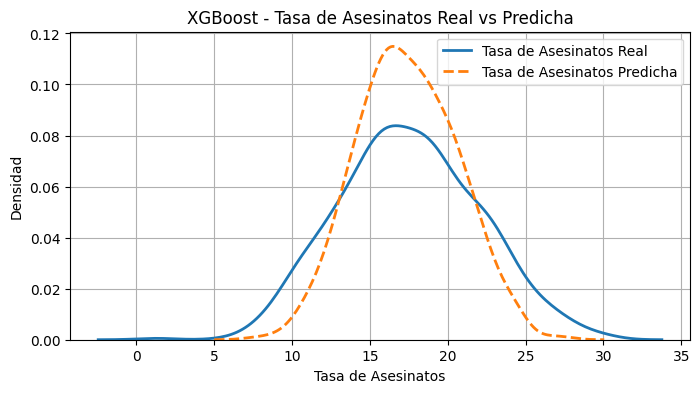

In [9]:
plt.figure(figsize=(8, 4))

sns.kdeplot(y_test, label='Tasa de Asesinatos Real', linewidth=2)
sns.kdeplot(y_pred, label='Tasa de Asesinatos Predicha', linewidth=2, linestyle='--')

plt.title('XGBoost - Tasa de Asesinatos Real vs Predicha')
plt.xlabel('Tasa de Asesinatos')
plt.ylabel('Densidad')
plt.legend()
plt.grid(True)
plt.show()

In [38]:
xgb_model = XGBRegressor(n_estimators=600, learning_rate=0.01, max_depth=4, random_state=42)
xgb_model.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=0.01, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=4,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=600,
             n_jobs=None, num_parallel_tree=None, ...)

In [39]:
y_pred = xgb_model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Error cuadrático medio (MSE): {mse:.2f}")
print(f"Coeficiente de determinación (R²): {r2:.2f}")

Error cuadrático medio (MSE): 9.64
Coeficiente de determinación (R²): 0.52


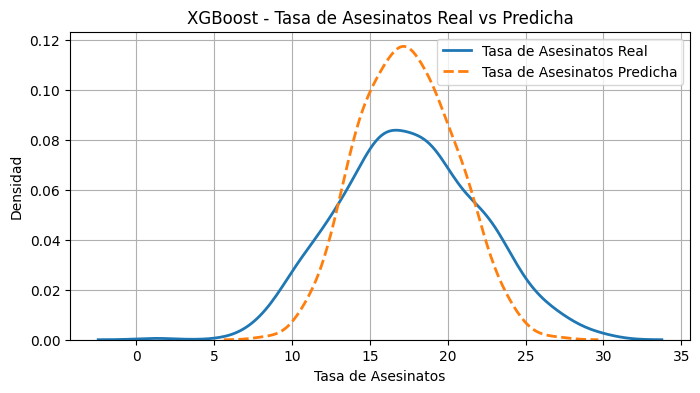

In [40]:
plt.figure(figsize=(8, 4))

sns.kdeplot(y_test, label='Tasa de Asesinatos Real', linewidth=2)
sns.kdeplot(y_pred, label='Tasa de Asesinatos Predicha', linewidth=2, linestyle='--')

plt.title('XGBoost - Tasa de Asesinatos Real vs Predicha')
plt.xlabel('Tasa de Asesinatos')
plt.ylabel('Densidad')
plt.legend()
plt.grid(True)
plt.show()

### Practicamente no cambio nada al momento de hacer cambio en los parametros para el entrenamiento solo aumento un poco el error cuadratico medio, y si aumento mas la profundidad disminuye el coeficiente de determinacion


# **CONCLUSIONES**
1.   ¿cuáles son los
3 factores con la mayor influencia (positiva o negativa) sobre la tasa de asesinatos?
   - Los 3 factores que aumentan la tasa de asesinatos son el indice gini, la tasa de desempleo juvenil e ingresos medios.

2.    ¿Qué algoritmo arrojó el valor de (R) más alto en el conjunto de prueba? ¿A qué cree que se debe su superioridad?
- El algoritmo con mas alto valor fue el SVR, siento que fue superior por la gran cantidad de datos y variables que contiene el dataset.

3. ¿Son las mismas? Si no, ¿por qué cree que el modelo no lineal se enfoca en variables diferentes?
- Si son las mismas


4. ¿Cómo se demostró el sobreajuste en el modelo de Árbol de Decisión? (Debe explicarse con la diferencia entre el (R2) de entrenamiento y el (R2) de prueba).
- Al momento de incrementar la profundidad en los parametros el R2 baja bastante pero utilizando menos profundidad que la por defecto logre mejorar el R2

5. Si el objetivo del proyecto fuera convencer al gobierno
de invertir en un programa social específico, ¿qué tipo de modelo recomendaría utilizar para respaldar su argumento y por qué?

- Por la gran cantidad de datos que se utilizan deberian utilizar el algoritmo SVR el cual tiene un porcentaje mayor en el coeficiente de determinacion.



